## Installing PyCaret

In [ ]:
pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 6.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 16.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 35.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 48.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 60.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 57.2 MB/s eta 0:00:00
   ━━━━━

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from pycaret.clustering import *
from sklearn.datasets import make_blobs
mpl.rcParams['figure.dpi'] = 300

*  Generating sample dataset with 1000 data points, 5 features, and 3 clusters using the `make_blobs` function.
*  The data is then converted into a Pandas DataFrame with specified column names.
Finally, it displays the first few rows of the DataFrame using `head()`.

In [ ]:
cols = ['column1', 'column2', 'column3',
        'column4', 'column5']

arr = make_blobs(n_samples = 1000, n_features = 5, random_state = 20,
                 centers = 3, cluster_std = 1)

data = pd.DataFrame(data = arr[0], columns = cols)

data.head()

,column1,column2,column3,column4,column5
0,2.916076,6.504857,8.246937,6.185952,-9.776481
1,-2.044462,5.282757,5.265467,7.487941,6.347177
2,3.439328,-3.020505,-0.783592,2.907385,-6.117881
3,2.155568,8.776136,5.788650,5.751763,-7.609132
4,-6.650020,5.458227,5.848407,7.150584,5.992247


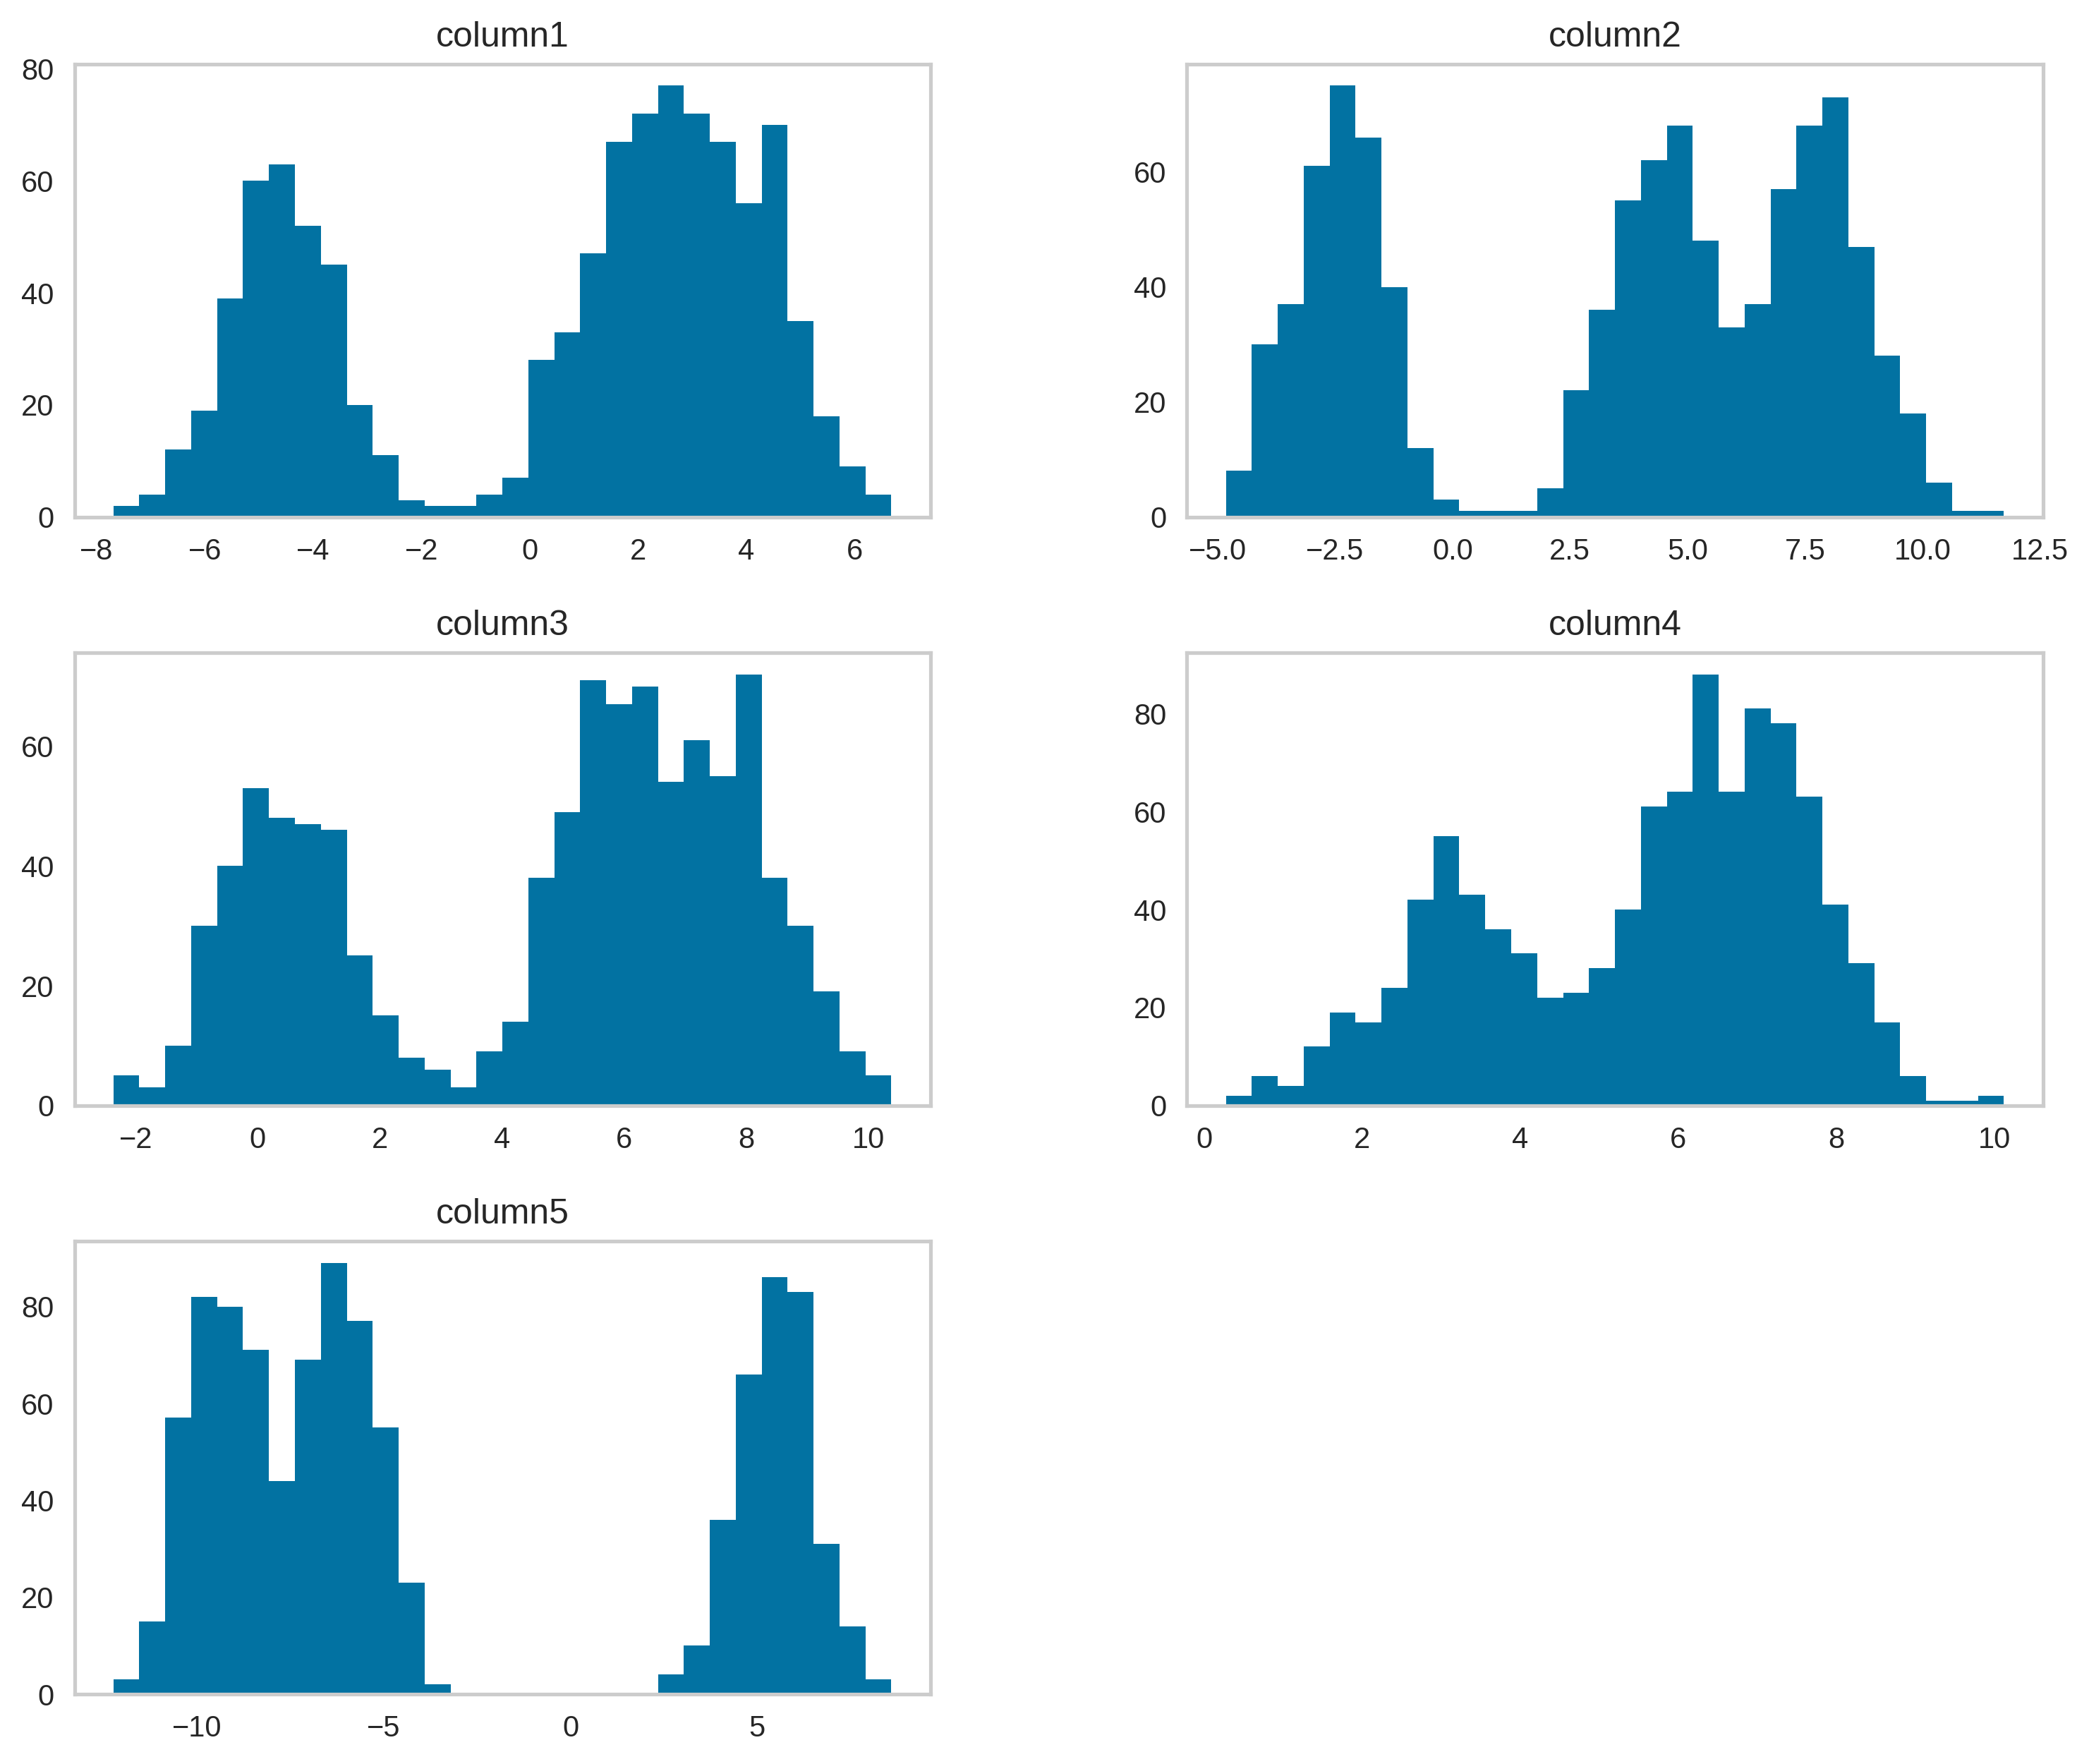

In [ ]:
data.hist(bins = 30, figsize = (12,10), grid = False)

plt.show()

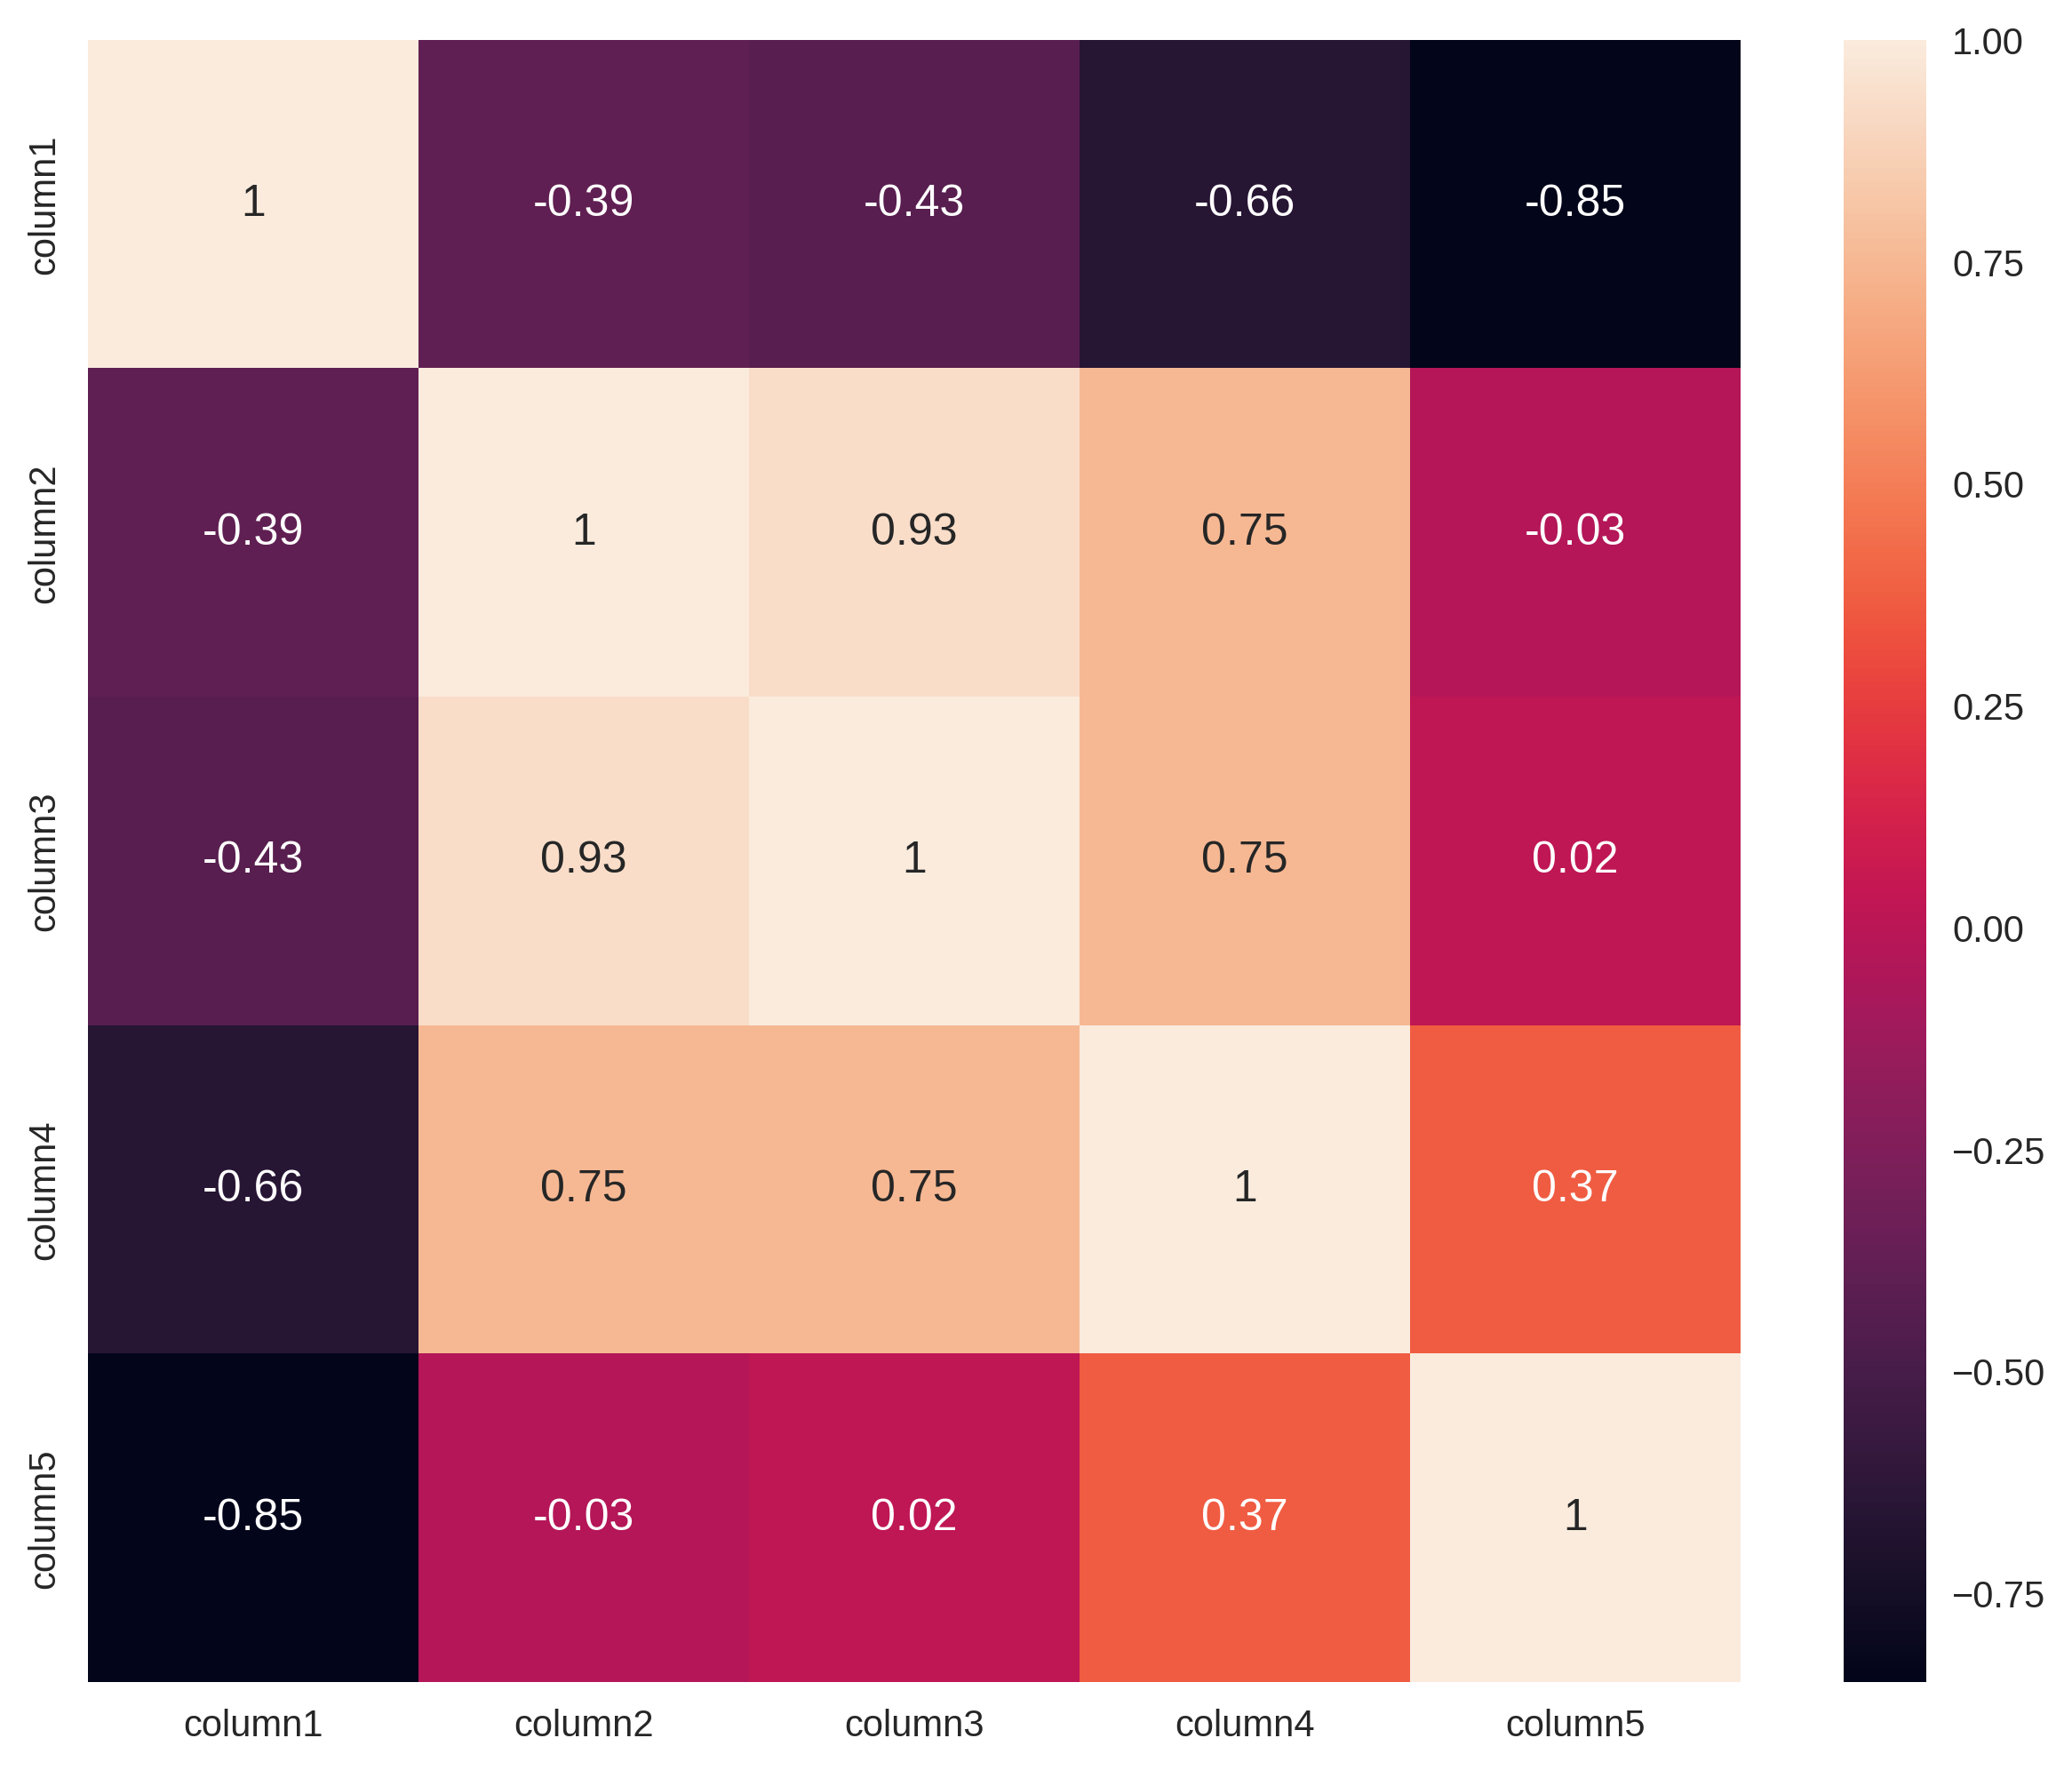

In [ ]:

plt.figure(figsize=(10, 8))
sns.heatmap(data.corr().round(decimals=2), annot=True)

plt.show()

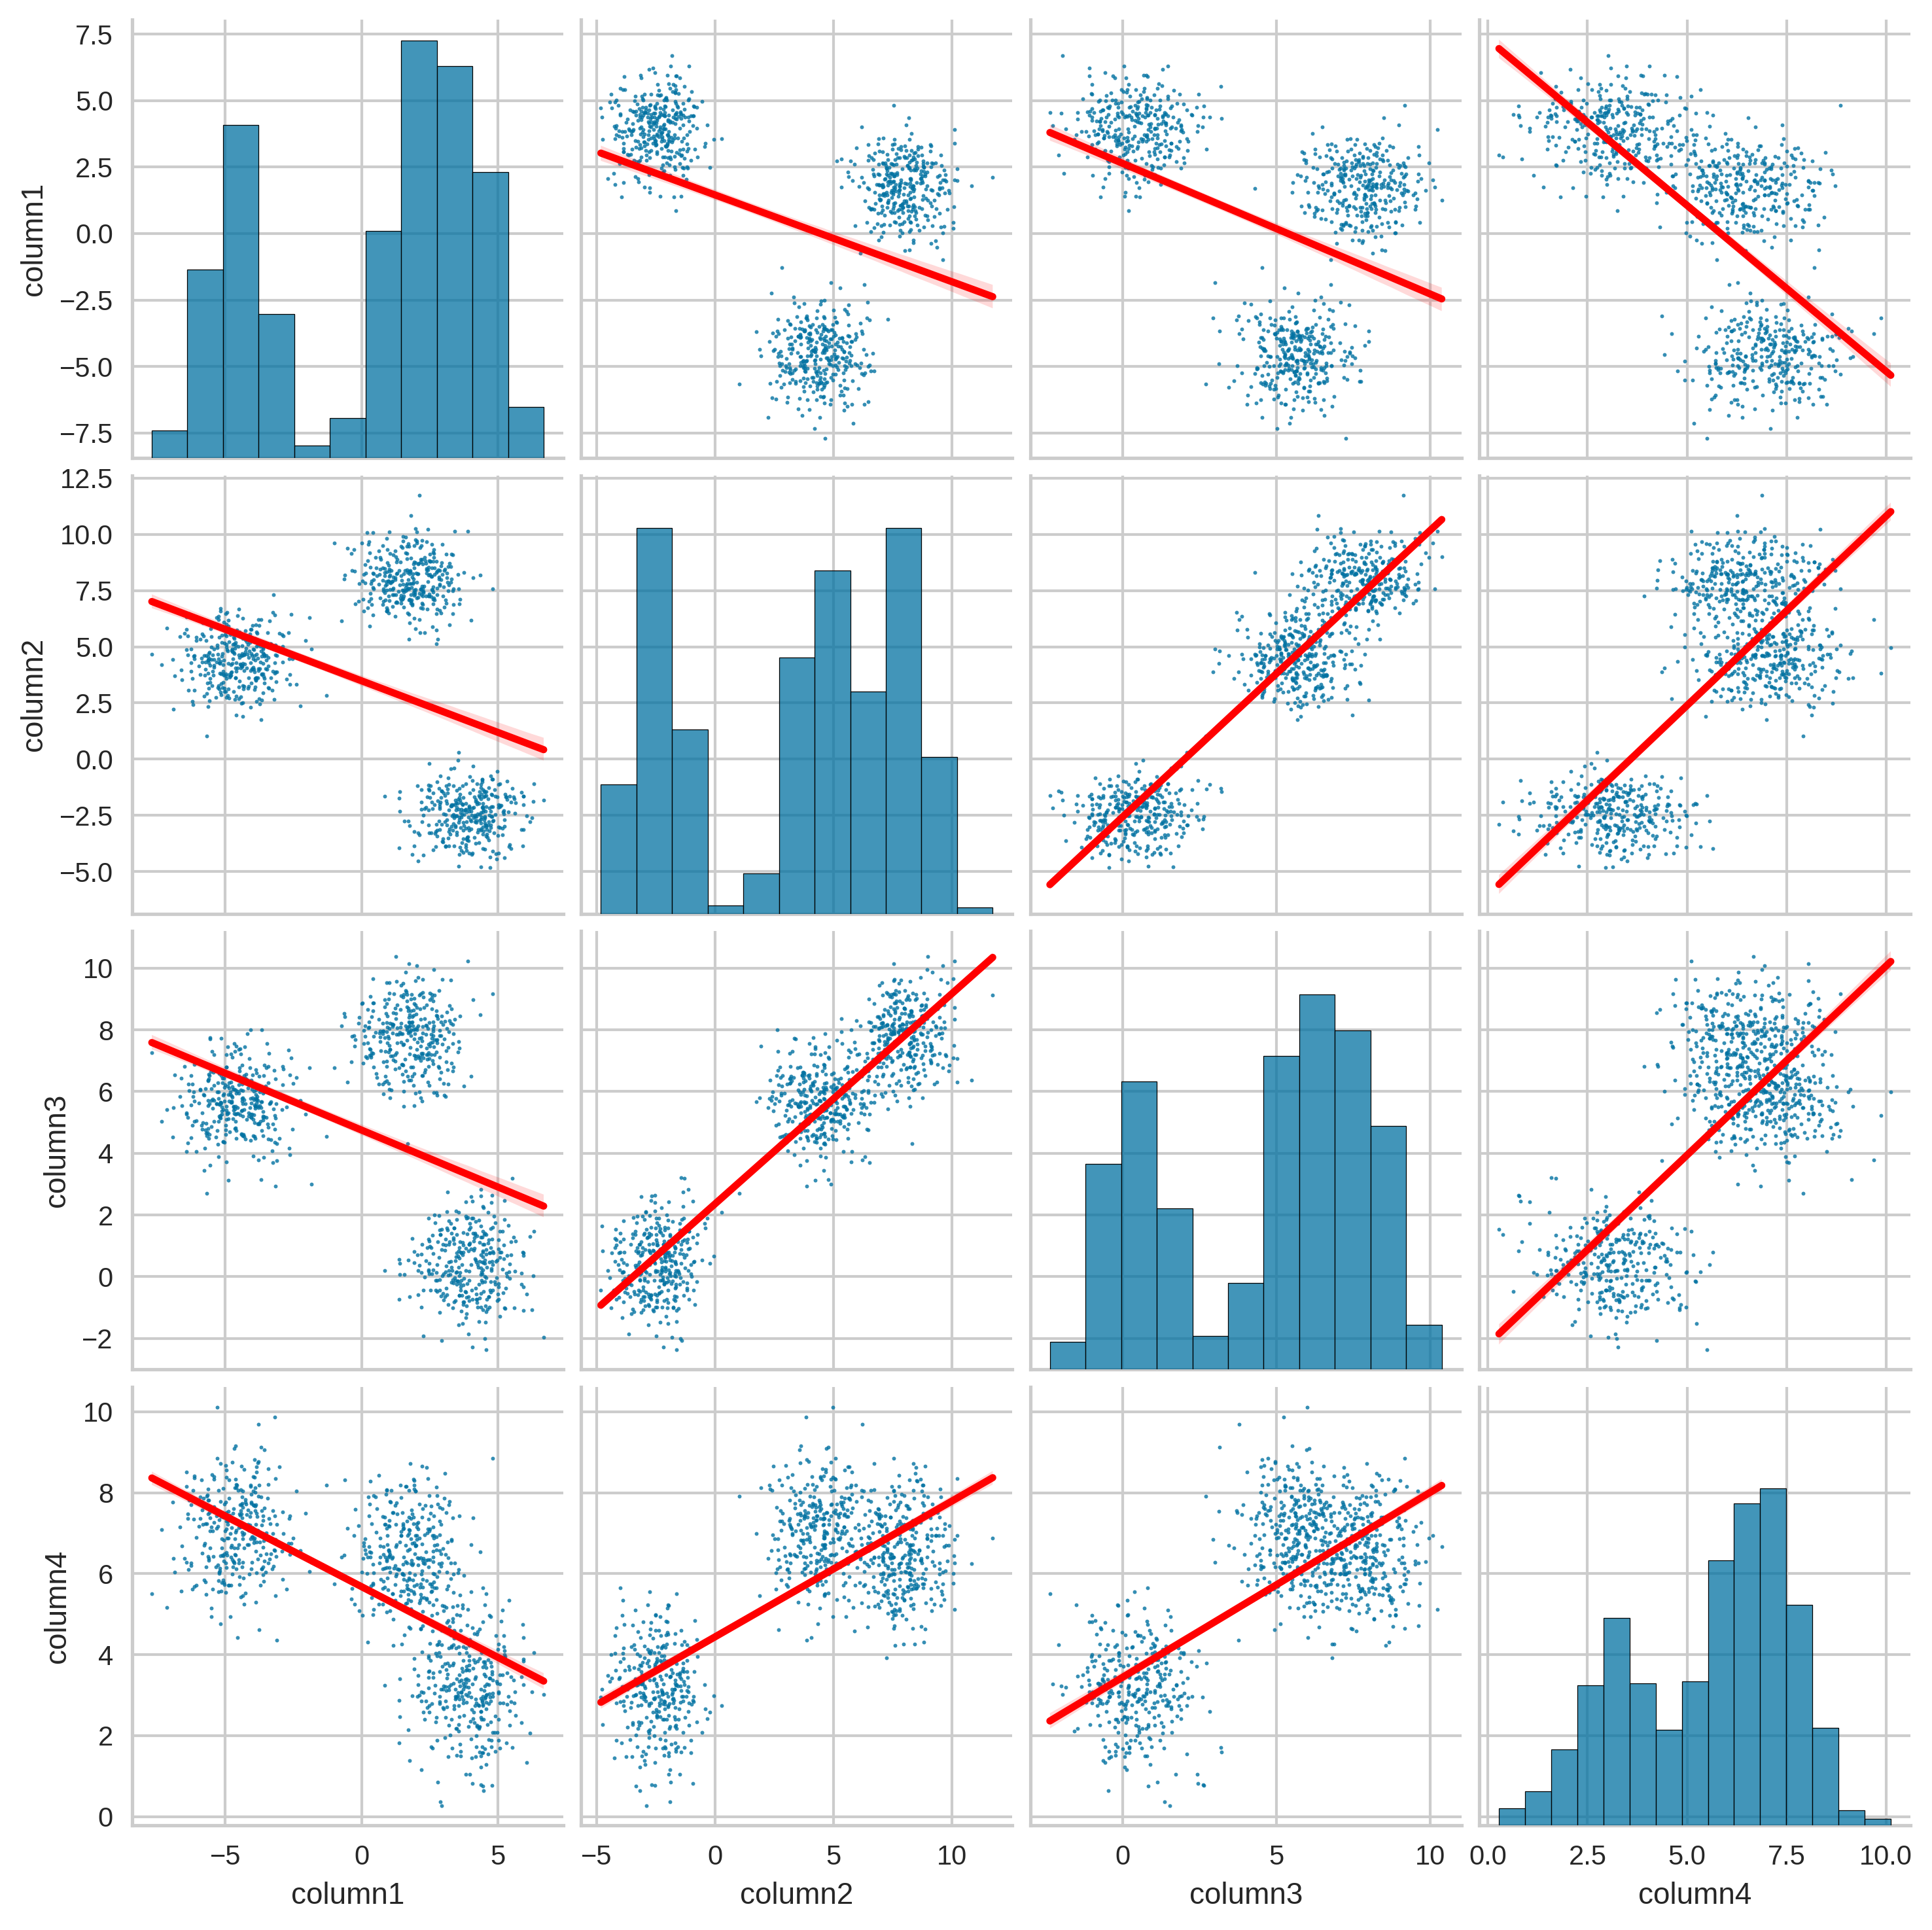

In [ ]:
plot_kws = {'scatter_kws': {'s': 2}, 'line_kws': {'color': 'red'}}

sns.pairplot(data, kind='reg', vars=data.columns[:-1], plot_kws=plot_kws)
plt.show()

## Initializing PyCaret Environment

In [ ]:
cluster = setup(data, session_id = 7652)

,Description,Value
0,Session id,7652
1,Original data shape,"(1000, 5)"
2,Transformed data shape,"(1000, 5)"
3,Numeric features,5
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5721,6026.1753,1.2814,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

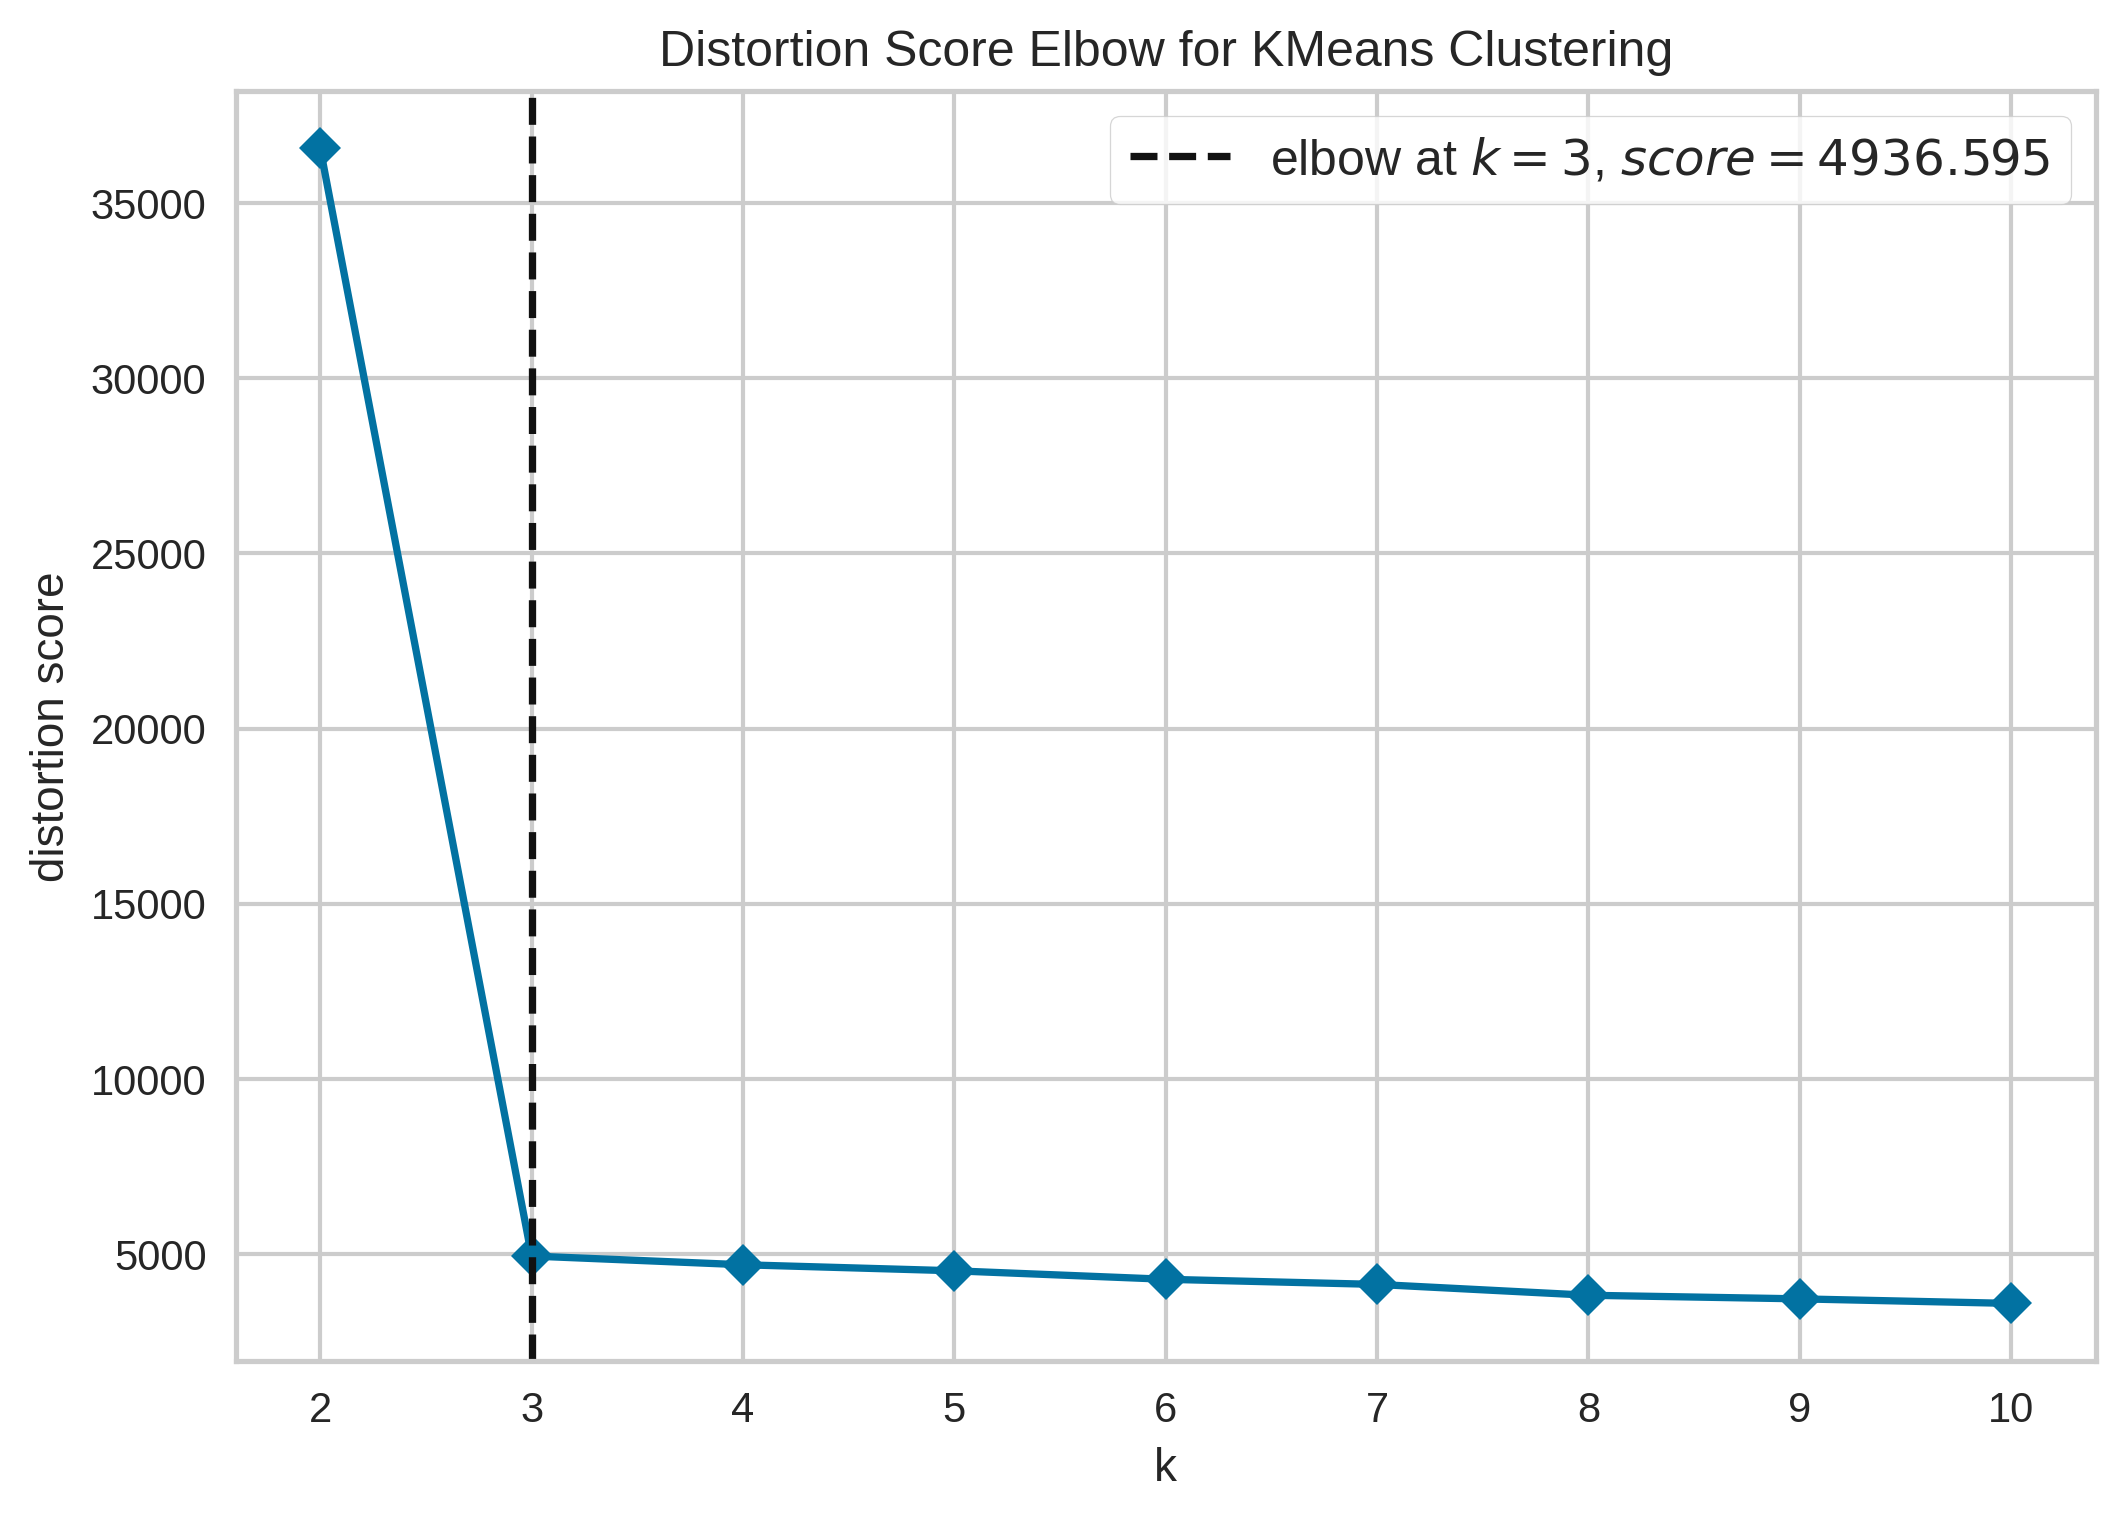

In [ ]:
model = create_model('kmeans')

plot_model(model, 'elbow')

In [ ]:

model = create_model('kmeans', num_clusters = 3)
plot_model(model, 'cluster')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.7972,8565.5114,0.2904,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
save_model(model, 'clustering_model', verbose = False)

results = assign_model(model)
results.head(10)

,column1,column2,column3,column4,column5,Cluster
0,2.916076,6.504857,8.246937,6.185952,-9.776482,Cluster 0
1,-2.044462,5.282757,5.265467,7.487941,6.347177,Cluster 1
2,3.439328,-3.020505,-0.783592,2.907385,-6.117881,Cluster 2
3,2.155568,8.776135,5.788650,5.751763,-7.609132,Cluster 0
4,-6.650020,5.458227,5.848407,7.150584,5.992247,Cluster 1
5,2.845247,8.015184,9.271296,6.060791,-8.281544,Cluster 0
6,-6.252012,3.910582,4.499606,6.197325,5.454781,Cluster 1
7,-4.962223,2.730723,6.787934,7.299566,5.073319,Cluster 1
8,1.727624,6.452070,6.378150,4.688653,-9.605882,Cluster 0
9,-5.568622,4.162203,7.741415,7.373318,5.787458,Cluster 1
